In [1]:
import numpy as np    # for linear algebra
import pandas as pd   # for data processing; Created by Wes McKinney at AQR (hedge fund)

In [2]:
import datetime
start_date = datetime.date(2016, 1, 1)
end_date   = datetime.date.today()
#end_date   = '2017-05-08'

#help(datetime.datetime)    # also has hh:mm:ss.mmmmmm, tzinfo

In [3]:
from pandas_datareader.data import DataReader    # pip install pandas-datareader

SYMBOL = 'GS'
SOURCE = 'yahoo'
# http://finance.yahoo.com/quote/GS/history?p=GS

df_stock = DataReader(SYMBOL, SOURCE, start_date, end_date)
print(type(df_stock))
df_stock.tail()

#?DataReader

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,230.000000,230.100006,225.570007,228.960007,3715600,228.960007
2017-04-04,227.720001,230.690002,227.279999,229.259995,3032100,229.259995
2017-04-05,232.149994,232.889999,227.309998,227.660004,5278000,227.660004
2017-04-06,227.089996,230.119995,225.710007,228.639999,2918300,228.639999
2017-04-07,226.600006,228.830002,226.229996,227.880005,2849600,227.880005


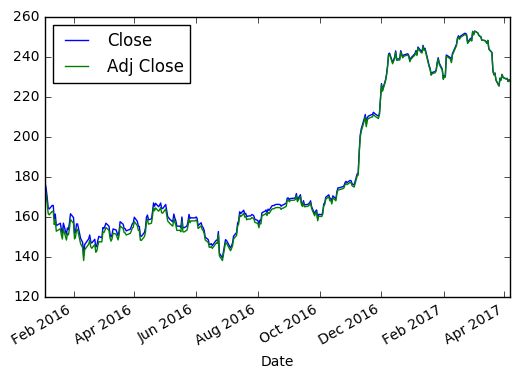

In [4]:
import matplotlib.pyplot as plt
df_stock[['Close', 'Adj Close']].plot()
plt.show()

In [5]:
df_stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,319.000000,319.000000,319.000000,319.000000,3.190000e+02,319.000000
mean,183.945392,185.765266,182.295141,184.104702,3.761169e+06,182.727372
std,36.878717,37.056524,36.669408,36.903399,1.693946e+06,37.540556
min,140.070007,141.229996,138.199997,139.509995,1.440800e+06,138.175485
25%,156.384995,158.114998,154.625000,156.480003,2.563100e+06,154.110038
50%,165.789993,167.289993,164.610001,165.839996,3.262300e+06,164.085839
75%,228.114998,230.110001,226.599998,228.595001,4.584600e+06,228.544998
max,253.710007,255.149994,251.259995,252.889999,1.134540e+07,252.889999


In [6]:
df_stock.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999133,0.999157,0.998135,0.027693,0.998057
High,0.999133,1.000000,0.999092,0.999236,0.044973,0.999076
Low,0.999157,0.999092,1.000000,0.999234,0.015924,0.999228
Close,0.998135,0.999236,0.999234,1.000000,0.031138,0.999906
Volume,0.027693,0.044973,0.015924,0.031138,1.000000,0.026941
Adj Close,0.998057,0.999076,0.999228,0.999906,0.026941,1.000000


In [7]:
#df_stock.to_csv('StockData/GS.csv')    # *.csv: Comma Separated Values

import os

# return csv file path given SYMBOL
def symbol_to_path(symbol, base_dir='StockData'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

df_stock.to_csv(symbol_to_path(SYMBOL))

In [8]:
df_csv = pd.read_csv(symbol_to_path(SYMBOL), header=0)
# After read_csv(), the Date index becomes another column, and instead an integer index is formed
df_csv.head(7)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-01-04,175.789993,177.190002,173.759995,177.139999,3745500,173.974020
1,2016-01-05,176.710007,177.500000,172.919998,174.089996,4521600,170.978529
2,2016-01-06,171.309998,172.020004,169.100006,169.839996,5539400,166.804488
3,2016-01-07,166.669998,169.500000,163.600006,164.619995,5687900,161.677783
4,2016-01-08,166.750000,168.419998,163.630005,163.940002,4929800,161.009944
5,2016-01-11,165.000000,166.460007,163.339996,165.729996,4386500,162.767945
6,2016-01-12,166.889999,168.179993,163.300003,165.710007,4441300,162.748313


In [9]:
sr_AC = df_csv['Adj Close']
print(type(sr_AC))
sr_AC[5:10]

<class 'pandas.core.series.Series'>


5    162.767945
6    162.748313
7    156.148417
8    158.505516
9    152.828822
Name: Adj Close, dtype: float64

In [10]:
AC = df_csv['Adj Close'].values    # Eliminate the integer index
print(type(AC))

<class 'numpy.ndarray'>


In [11]:
n = 20    # how many to look back
p = 5     # how many to look forward
m = len(AC) - n - p + 1    # num of usable sample sets

# To manually split tn:cv:tt = 0.6:0.2:0.2 (since we don't want to shuffle)
pct_tn = 0.6    # percentage of training data
pct_cv = 0.2    # percentage of cross validation data
m_tn = int(m * pct_tn)
m_cv = int(m * pct_cv)
m_tt = m - m_tn - m_cv

print(len(AC), m, m_tn, m_cv, m_tt)
# print(m_tn + n + p - 1)    # for [0,1] scaling

319 295 177 59 59


In [12]:
from sklearn import preprocessing

# Standard Normalization
#sc = preprocessing.StandardScaler()
#print(sc)
#sc.fit(X_tn.reshape(-1,1))    # Fit using training set
#AC_sc = sc.transform(AC.reshape(-1, 1))    # Transform all

# Manually scale to unit length: [0,1]
# However, especially when new data is outside of [0,1], the learned model fails
# Therefore, [0,1] scaling should be done for each and every set of data
#AC_tn = AC[:m_tn + n + p - 1]
#AC_tn_max = AC_tn.max(axis=0)
#AC_tn_min = AC_tn.min(axis=0)
#AC_sc = (AC - AC_tn_min) / (AC_tn_max - AC_tn_min)

In [13]:
X = np.zeros((m, n))
#X = np.zeros((m, n), dtype=float)    # or ones(), empty(), dtype=np.float64
#X = np.random.random((m, n))    # random floats from half-open interval [0.0, 1.0)
#X = np.random.normal(loc=0, scale=1, size=(m,n))    # random normal distribution of mean 0, std 1
#print(np.random.randint(0, 10, size=(2,3)))
#print(X.dtype)    # float64 datatype

# Scale to unit length: [0,1]
mMs = preprocessing.MinMaxScaler()
print(mMs)

# Note that i is defined as at the end of the trading day
for i in range(m):
    X[i] = AC[i:i+n]
    X[i] = mMs.fit_transform(X[i].reshape(-1, 1)).reshape(n)

y = np.where(AC[n+p-1:] > AC[n-1:-p], 1., 0.)
#type(y[0])    # float64 datatype

MinMaxScaler(copy=True, feature_range=(0, 1))


In [14]:
i = 107
print(X[i])
print(X[i][n-1])

[ 1.          0.96615589  0.87228609  0.6628354   0.58237602  0.4265649
  0.42464927  0.45466211  0.39144338  0.5261816   0.56449611  0.55108576
  0.8397194   0.15006421  0.          0.18518573  0.38250343  0.57918297
  0.55811008  0.31545349]
0.315453492369


In [15]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1

In [16]:
# Split manually
X_tn = X[:m_tn]
y_tn = y[:m_tn]
X_cv = X[m_tn:m_tn+m_cv]
y_cv = y[m_tn:m_tn+m_cv]
X_tt = X[-m_tt:]
y_tt = y[-m_tt:]

#from sklearn.model_selection import train_test_split    # old version: from sklearn.cross_validation import train_test_split

# Split tn:tt = 0.7:0.3
# X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.3, random_state=27)

# Split tn:cv:tt = 0.6:0.2:0.2
#X_tn, X_temp, y_tn, y_temp = train_test_split(X, y, test_size=0.4, random_state=27)
#X_cv, X_tt, y_cv, y_tt = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
print(clf_knn)

clf_knn.fit(X_tn, y_tn)

print(clf_knn.score(X_tn, y_tn))
print(clf_knn.score(X_cv, y_cv))
print(clf_knn.score(X_tt, y_tt))
clf_knn.predict(X_tt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')
0.677966101695
0.440677966102
0.389830508475


array([ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [18]:
# Comparing predict() vs predict_proba()
np.column_stack([clf_knn.predict(X_tt), np.round(clf_knn.predict_proba(X_tt), 3)])

array([[ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.364,  0.636],
       [ 1.   ,  0.455,  0.545],
       [ 0.   ,  0.727,  0.273],
       [ 0.   ,  0.727,  0.273],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.273,  0.727],
       [ 1.   ,  0.364,  0.636],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.364,  0.636],
       [ 1.   ,  0.364,  0.636],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.455,  0.545],
       [ 0.   ,  0.545,  0.455],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.182,  0.818],
       [ 1.   ,  0.091,  0.909],
       [ 1.   ,  0.   ,  1.   ],
       [ 1.   ,  0.182,  0.818],
       [ 1.   ,  0.364,  0.636],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.455,  0.545],
       [ 1.   ,  0.364,  0.636],
       [ 0.   ,  0.545,  0.455],
       [ 0.   ,  0.727,  0.273],
       [ 0.   ,  0.727,  0.273],
       [ 0.   ,  0.636,  0.364],
       [ 0.   ,  0.818,  0.182],
       [ 0.   ,  0.909,  0.091],
       [ 0

In [19]:
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
print(clf_svm)

#import time
#t1 = time.time()

clf_svm.fit(X_tn, y_tn)
print(clf_svm.score(X_tn, y_tn))
print(clf_svm.score(X_cv, y_cv))
print(clf_svm.score(X_tt, y_tt))
clf_svm.predict(X_tt)

#t2 = time.time()
#print('\n', 'It took', (t2-t1), 'seconds')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.677966101695
0.35593220339
0.474576271186


array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_raf = RandomForestClassifier(n_estimators=50)
print(clf_raf)

clf_raf.fit(X_tn, y_tn)
print(clf_raf.score(X_tn, y_tn))
print(clf_raf.score(X_cv, y_cv))
print(clf_raf.score(X_tt, y_tt))
clf_raf.predict(X_tt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
1.0
0.35593220339
0.406779661017


array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.])